#Fed Yield Curve
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

#Read the wholebook
wb = pd.ExcelFile(r"T:\Operations\Personal\Carter E\Python Docs\Names_PY.xlsx")

#read the second sheet (sheet_2)
sheet_3 = pd.read_excel(r"T:\Operations\Personal\Carter E\Python Docs\Names_PY.xlsx",sheetname = 3)

df = sheet_3

ax = df.plot("observation_date")
ax.legend(loc = 'best')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()


#print the second sheet vs fed sheet

sheet_2 = sheet_3 = pd.read_excel(r"T:\Operations\Personal\Carter E\Python Docs\Names_PY.xlsx",sheetname = 1)

df = sheet_2
ax = df.plot("Year")
ax.legend(loc = 'best')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.3%}'.format(y)))
plt.show()


# FRED API: DO BEFORE RUNNING ANYTHING

In [4]:
#importing appropriate modules

import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

from fredapi import Fred
fred = Fred(api_key='b4ba9c4124a6aa7fc100344e3016c445')


In [5]:
#test

from fredapi import Fred
fred = Fred(api_key='b4ba9c4124a6aa7fc100344e3016c445')
data = fred.get_series('SP500')
data.tail()

2017-08-09    2474.02
2017-08-10    2438.21
2017-08-11    2441.32
2017-08-14    2465.84
2017-08-15    2464.61
dtype: float64

# Import Quandl API

In [6]:
import quandl
quandl.ApiConfig.api_key = 'fyM5tJ_dSdV3VMsv84VQ'

#data = quandl.get_table('ZACKS/FC', ticker='AAPL')
#data.tail()


#syntax
#pizza = quandl.get(["wiki/DPZ.4","wiki/aapl.4"], transform = "normalize")
#ax = pizza.plot()
#plt.show()


# GDP SERIES

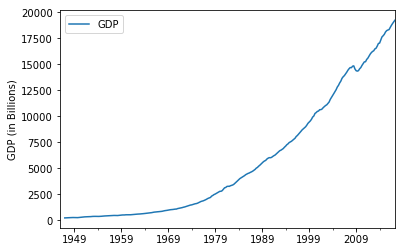

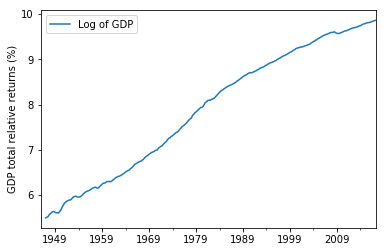

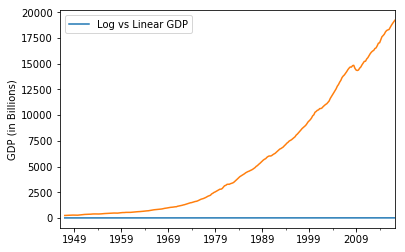

In [7]:
#regular return of GDP
data = fred.get_series('GDP')
df = data
data.tail()
ax = df.plot()

plt.legend(['GDP'])
ax.set_ylabel('GDP (in Billions)')
plt.show()

#attempt at log data 

data = fred.get_series('GDP')
log_gdp= data = np.log(data)


ax = log_gdp.plot()
plt.legend(['Log of GDP'])
ax.set_ylabel('GDP total relative returns (%)')
plt.show()


#log vs linear graph

ax = log_gdp.plot()
ax = df.plot()
plt.legend(['Log vs Linear GDP'])
ax.set_ylabel('GDP (in Billions)')
plt.show()


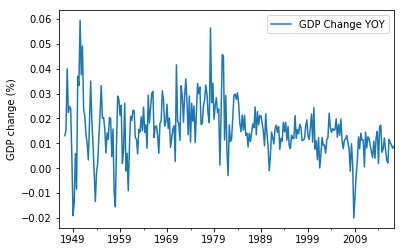

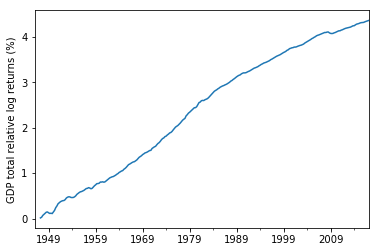

In [8]:
#attempt at log YOY % changes of GDP
data = fred.get_series('GDP')
df = data
returnGDP = data.pct_change(1)
log_returnGDP = np.log(data).diff()

ax = log_returnGDP.plot()

plt.legend(['GDP Change YOY'])
ax.set_ylabel('GDP change (%)')
plt.show()

#cumulative sum of GDP
ax = log_returnGDP.cumsum().plot()
ax.set_ylabel('GDP total relative log returns (%)')
plt.show()

# #GDP and S&P VS UNEMPLOYMENT


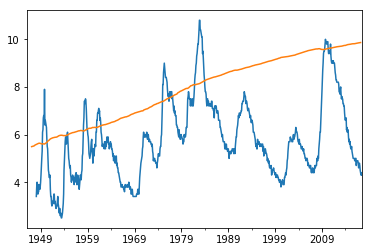

In [9]:
#log of GDP data to normalize to unemployment rate
data = fred.get_series('GDP')
log_gdp= data = np.log(data)


un_data = fred.get_series('UNRATE')
ax = un_data.plot()
ax = log_gdp.plot()

plt.show()

In [10]:
#log of GDP data to normalize to unemployment rate

un_data = fred.get_series('UNRATE')

#SPX data cleaned into excel and imported, below reads excel and prints names
file= r'T:\Operations\Personal\Carter E\Python Docs\Names_PY.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

#parses out excel and takes log of data and plots
df = xl.parse('spxcleaned')
#log_df = np.log(df.Price).diff() 
log_df = np.log(df.Price)
#log_df.columns = ['year','Price']
#<- the diff shows percentage change by day

#ax = log_df.plot()




#ax1 = un_data.plot()
#ax = log_df.plot()
print(un_data)
print(log_df)
print(df)


#ax = log_df.plot()
plt.show()


['sheet', 'yield curve', 'Sheet1', '10yrfred', 'spxcleaned', 'spx vol', 'spxhist']
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
1948-06-01    3.6
1948-07-01    3.6
1948-08-01    3.9
1948-09-01    3.8
1948-10-01    3.7
1948-11-01    3.8
1948-12-01    4.0
1949-01-01    4.3
1949-02-01    4.7
1949-03-01    5.0
1949-04-01    5.3
1949-05-01    6.1
1949-06-01    6.2
1949-07-01    6.7
1949-08-01    6.8
1949-09-01    6.6
1949-10-01    7.9
1949-11-01    6.4
1949-12-01    6.6
1950-01-01    6.5
1950-02-01    6.4
1950-03-01    6.3
1950-04-01    5.8
1950-05-01    5.5
1950-06-01    5.4
             ... 
2015-02-01    5.5
2015-03-01    5.4
2015-04-01    5.4
2015-05-01    5.5
2015-06-01    5.3
2015-07-01    5.2
2015-08-01    5.1
2015-09-01    5.0
2015-10-01    5.0
2015-11-01    5.0
2015-12-01    5.0
2016-01-01    4.9
2016-02-01    4.9
2016-03-01    5.0
2016-04-01    5.0
2016-05-01    4.7
2016-06-01    4.9
2016-07-01    4.9
2016-08-01    4.9
2016-09-01    4.9

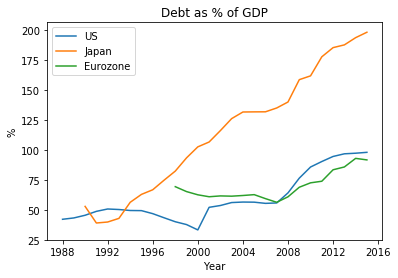

In [11]:
debt_to_gdp = fred.get_series('DEBTTLUSA188A')
china = fred.get_series('DEBTTLCNA188A')
japan = fred.get_series('DEBTTLJPA188A')
euroarea= fred.get_series('GCDODTOTLGDZSEMU')


#GDP = pd.concat([Personal_consumption, Gvt_spending, Pvt_inv, Net_exports], axis=1)
#plt.plot(Personal_consumption, label='Personal consumption')
#plt.plot(Gvt_spending, label='Government Spending')
#plt.plot(Pvt_inv, label='Private Investment')
#plt.plot(Net_exports, label='Net Exports')
#plt.title('Components of GDP')
#plt.xlabel('Year')
#plt.ylabel('Amount (B)')
Debt = pd.concat([debt_to_gdp,china], axis = 1)

plt.plot(debt_to_gdp, label = 'US')
#plt.plot(china, label = 'China')
plt.plot(japan, label = 'Japan')
plt.plot(euroarea, label = 'Eurozone')


plt.legend()
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Debt as % of GDP')

plt.show();

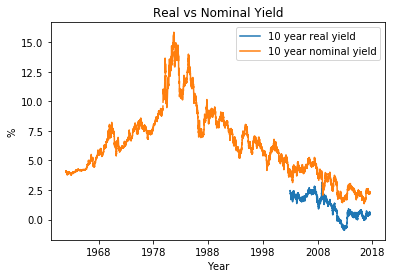

In [12]:
#GDP and Household Debt
tenyeartips = fred.get_series('DFII10')
tenyear = fred.get_series('DGS10')

Yield = pd.concat([tenyeartips, tenyear], axis = 1)

plt.plot(tenyeartips, label = '10 year real yield')
plt.plot(tenyear, label = '10 year nominal yield')

plt.legend()
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Real vs Nominal Yield')

#xaxis = dict(
 #   range = ['2016-07-01','2016-12-31'])

#ax.tick_params(direction='in', length=10, width=5)


plt.show();

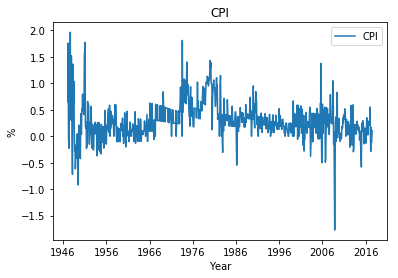

In [13]:
#CPI to inflation
CPI = fred.get_series('CPIAUCSL')
#log_returnCPI = np.log(CPI)#.diff()
CPI_PCT = (CPI.pct_change())*100

InflationGraph = pd.concat([CPI_PCT], axis = 1)

plt.plot(CPI_PCT, label = 'CPI')



plt.legend()
plt.xlabel('Year')
plt.ylabel('%')
plt.title('CPI')
#ax.grid()
#fig = plt.figure(figsize=[30,9])
plt.show();


#log_returnCPI.tail()

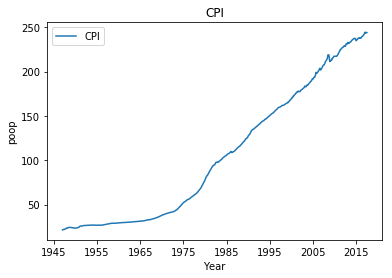

In [14]:
#CPI to inflation
data1 = fred.get_series('CPIAUCSL')
#log_returnCPI = np.log(CPI)#.diff()
InflationGraph = pd.concat([data], axis = 1)

plt.plot(data1, label = 'CPI')



plt.legend()
plt.xlabel('Year')
plt.ylabel('poop')
plt.title('CPI')
#ax.grid()
#fig = plt.figure(figsize=[30,9])
plt.show();

#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#periodindex-and-period-range
#https://www.maa.org/press/periodicals/loci/joma/the-consumer-price-index-and-inflation-calculate-and-graph-inflation-rates
